## Final Project Submission

Please fill out:
* Student name: JOHN MALAK
* Student pace: Full time
* Scheduled project review date/time:  12/3/23
* Instructor name: WILLIAM OKOMBA
* Blog post URL:


In [497]:
# import libraries 
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [498]:
# importing the csv file
df = pd.read_csv('tmdb.movies.csv')
df.head(5)

,Unnamed: 0,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
2,2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368
3,3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174
4,4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186


In [499]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26517 entries, 0 to 26516
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         26517 non-null  int64  
 1   genre_ids          26517 non-null  object 
 2   id                 26517 non-null  int64  
 3   original_language  26517 non-null  object 
 4   original_title     26517 non-null  object 
 5   popularity         26517 non-null  float64
 6   release_date       26517 non-null  object 
 7   title              26517 non-null  object 
 8   vote_average       26517 non-null  float64
 9   vote_count         26517 non-null  int64  
dtypes: float64(2), int64(3), object(5)
memory usage: 2.0+ MB


In [500]:
# checking the data's description to check the nature of the data
df.describe()

,Unnamed: 0,id,popularity,vote_average,vote_count
count,26517.00000,26517.000000,26517.000000,26517.000000,26517.000000
mean,13258.00000,295050.153260,3.130912,5.991281,194.224837
std,7654.94288,153661.615648,4.355229,1.852946,960.961095
min,0.00000,27.000000,0.600000,0.000000,1.000000
25%,6629.00000,157851.000000,0.600000,5.000000,2.000000
50%,13258.00000,309581.000000,1.374000,6.000000,5.000000
75%,19887.00000,419542.000000,3.694000,7.000000,28.000000
max,26516.00000,608444.000000,80.773000,10.000000,22186.000000


In [501]:
# changing release date to a datetime format
df['release_date'] = pd.to_datetime(df['release_date'])


In [502]:
# Checking for duplicates
df.duplicated

<bound method DataFrame.duplicated of        Unnamed: 0            genre_ids      id original_language  \
0               0      [12, 14, 10751]   12444                en   
1               1  [14, 12, 16, 10751]   10191                en   
2               2        [12, 28, 878]   10138                en   
3               3      [16, 35, 10751]     862                en   
4               4        [28, 878, 12]   27205                en   
...           ...                  ...     ...               ...   
26512       26512             [27, 18]  488143                en   
26513       26513             [18, 53]  485975                en   
26514       26514         [14, 28, 12]  381231                en   
26515       26515      [10751, 12, 28]  366854                en   
26516       26516             [53, 27]  309885                en   

                                     original_title  popularity release_date  \
0      Harry Potter and the Deathly Hallows: Part 1      33.533  

In [503]:
# dropping duplicates in the data
print(df.duplicated().sum())

df.drop_duplicates(inplace=True)


0


In [504]:
# checking for missing values
df.isnull().sum()

Unnamed: 0           0
genre_ids            0
id                   0
original_language    0
original_title       0
popularity           0
release_date         0
title                0
vote_average         0
vote_count           0
dtype: int64

In [505]:
# Handling the missing values
df['popularity'].fillna(df['popularity'].mean(), inplace=True)
df['vote_average'].fillna(df['vote_average'].mean(), inplace=True)
df['vote_count'].fillna(df['vote_count'].mean(), inplace=True)

df.dropna(inplace=True)


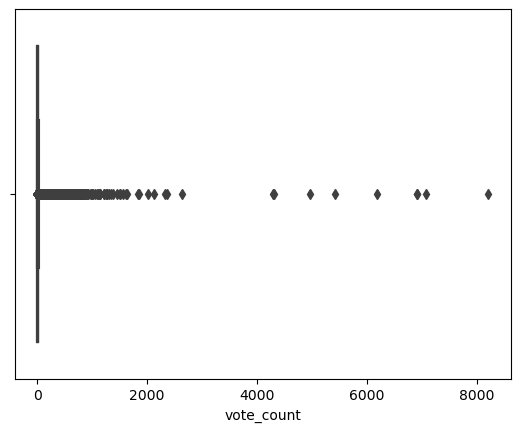

In [506]:
# checking for and handling any outliers in the 'popularity', 'vote_average', and 'vote_count' columns:
sns.boxplot(x=df['popularity'])

q1 = df['popularity'].quantile(0.25)
q3 = df['popularity'].quantile(0.75)
iqr = q3 - q1

df = df[(df['popularity'] >= (q1 - 1.5*iqr)) & (df['popularity'] <= (q3 + 1.5*iqr))]

sns.boxplot(x=df['vote_average'])

q1 = df['vote_average'].quantile(0.25)
q3 = df['vote_average'].quantile(0.75)
iqr = q3 - q1

df = df[(df['vote_average'] >= (q1 - 1.5*iqr)) & (df['vote_average'] <= (q3 + 1.5*iqr))]

sns.boxplot(x=df['vote_count'])

q1 = df['vote_count'].quantile(0.25)
q3 = df['vote_count'].quantile(0.75)
iqr = q3 - q1

df = df[(df['vote_count'] >= (q1 - 1.5*iqr)) & (df['vote_count'] <= (q3 + 1.5*iqr))]

# The above code will create boxplots for each of the three columns, calculate the upper and lower bounds for outliers using the interquartile range (IQR), and remove any rows that have values outside of these bounds.


In [507]:
# Filtering the data into the relevant columns to be used in data analysis
df2 = df.filter(items = ['original_title','release_date',  'popularity', 'vote_average','original_language'])
df2

,original_title,release_date,popularity,vote_average,original_language
229,Tom and Jerry Meet Sherlock Holmes,2010-08-24,8.142,6.6,en
292,Growth,2010-01-29,7.280,5.2,en
318,Across the Line: The Exodus of Charlie Wright,2010-12-29,6.863,5.9,en
325,Triassic Attack,2010-11-27,6.706,3.2,en
336,Firebreather,2010-11-24,6.591,6.2,en
...,...,...,...,...,...
26494,La última virgen,2018-05-26,0.600,2.0,es
26495,Recursion,2018-08-28,0.600,2.0,en
26496,The Case of: Caylee Anthony,2018-05-19,0.600,2.0,en
26497,The Portuguese Kid,2018-02-14,0.600,2.0,en


In [508]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20071 entries, 229 to 26498
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   original_title     20071 non-null  object        
 1   release_date       20071 non-null  datetime64[ns]
 2   popularity         20071 non-null  float64       
 3   vote_average       20071 non-null  float64       
 4   original_language  20071 non-null  object        
dtypes: datetime64[ns](1), float64(2), object(2)
memory usage: 940.8+ KB


In [509]:
df2.describe

<bound method NDFrame.describe of                                       original_title release_date  popularity  \
229               Tom and Jerry Meet Sherlock Holmes   2010-08-24       8.142   
292                                           Growth   2010-01-29       7.280   
318    Across the Line: The Exodus of Charlie Wright   2010-12-29       6.863   
325                                  Triassic Attack   2010-11-27       6.706   
336                                     Firebreather   2010-11-24       6.591   
...                                              ...          ...         ...   
26494                               La última virgen   2018-05-26       0.600   
26495                                      Recursion   2018-08-28       0.600   
26496                    The Case of: Caylee Anthony   2018-05-19       0.600   
26497                             The Portuguese Kid   2018-02-14       0.600   
26498         The 23rd Annual Critics' Choice Awards   2018-01-11       0.6

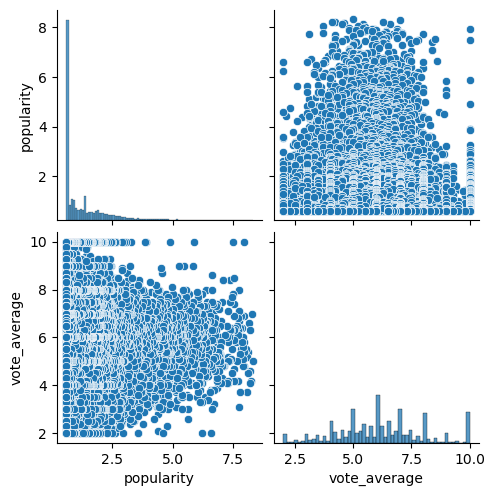

In [510]:
sns.pairplot(data)

In [511]:
data.head()

,original_title,release_date,popularity,vote_average,original_language
0,Tom and Jerry Meet Sherlock Holmes,2010-08-24,8.142,6.6,en
1,Growth,2010-01-29,7.28,5.2,en
2,Across the Line: The Exodus of Charlie Wright,2010-12-29,6.863,5.9,en
3,Triassic Attack,2010-11-27,6.706,3.2,en
4,Firebreather,2010-11-24,6.591,6.2,en


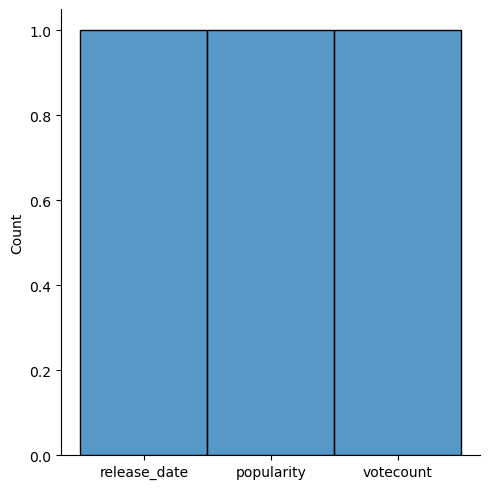

In [512]:
sns.displot(['release_date', 'popularity', 'votecount'], bins=5)

In [513]:
df.popularity.describe()

count    20071.000000
mean         1.434063
std          1.221769
min          0.600000
25%          0.600000
50%          0.883000
75%          1.841000
max          8.316000
Name: popularity, dtype: float64

In [514]:
q1=0.60000
q2=1.37400
q3=3.69400
iqr=q3-q1
upper_bound=q3+1.5*iqr
lower_bound=q3-1.5*iqr

<AxesSubplot:xlabel='popularity'>

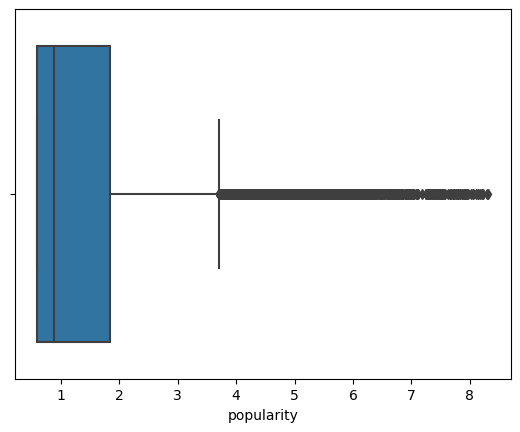

In [515]:
sns.boxplot(x=df['popularity'])

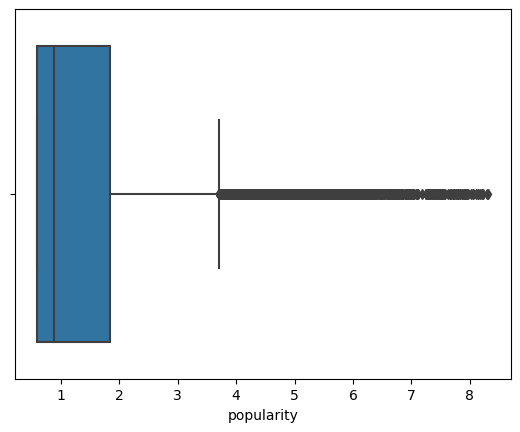

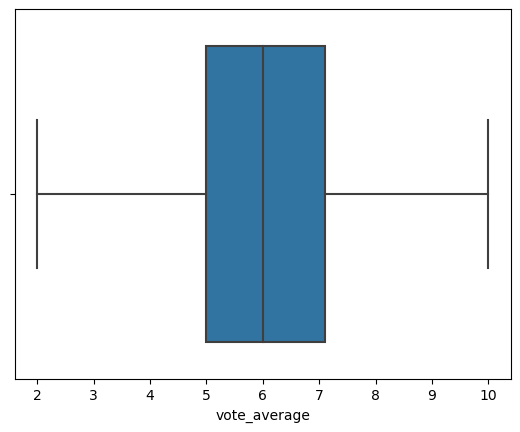

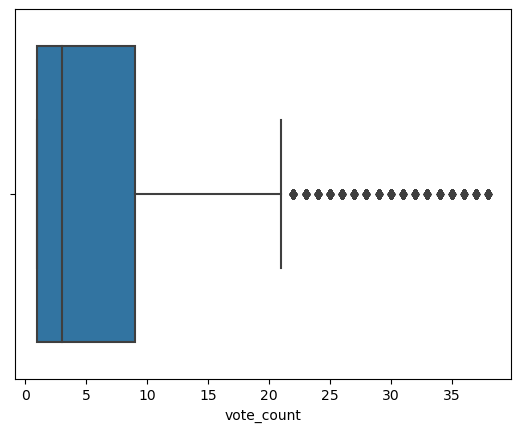

In [516]:
for i in col2:
    sns.boxplot(x=df[i])
    plt.show()

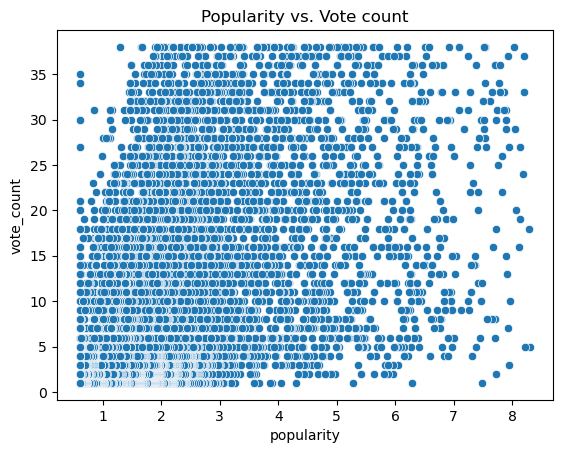

In [517]:
sns.scatterplot(x='popularity', y='vote_count', data=df)
plt.title('Popularity vs. Vote count')
plt.show()
# This code will create a scatterplot of 'popularity' versus 'vote_average'. 
# From the plot, we can see that there is a weak positive correlation between 'popularity' and 'vote_average'.

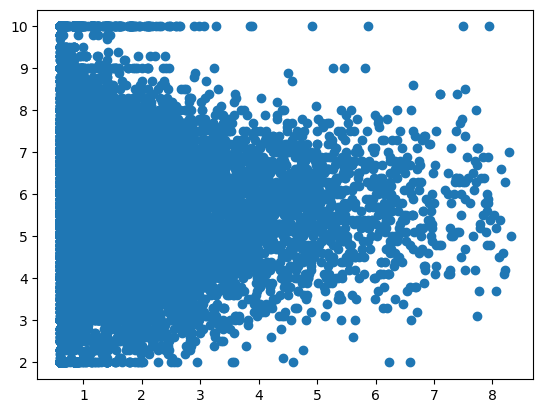

In [518]:
plt.scatter(df['popularity'], df['vote_average'])

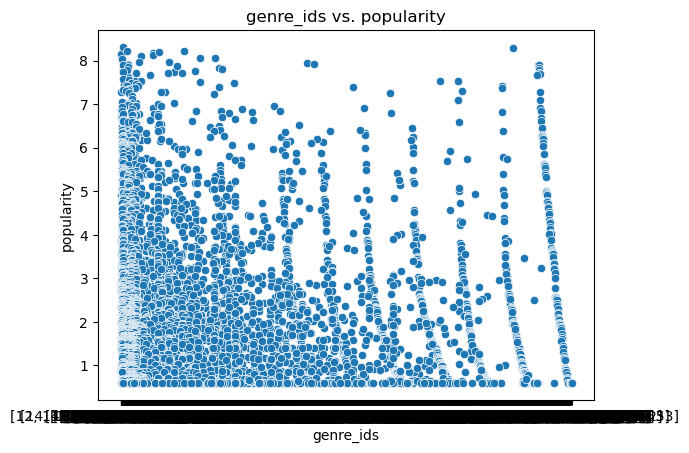

In [519]:
sns.scatterplot(x='genre_ids', y='popularity', data=df)
plt.title('genre_ids vs. popularity')
plt.show()

In [520]:
df.to_csv('tmdb.movies_cleaned.csv', index=False)